# **California Housing Price**

[Sumber data California Housing Price](https://drive.google.com/file/d/1NJ7DsgZ3zIdZWTz17RQWgbtDBuk1JVg3/view) 

**Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## 1. Business Problem Understanding

**Context**

Data set ini merupakan kumpulan data perumahan di kawasan California, Amerika Serikat hasil dari sensus yang dilakukan di tahun 1990 yang berisikan data-data demografik (income, populasi, house occupancy) di suatu area, lokasi area (latitude, longitude) dan informasi general terkait rumah yang berada di area tersebut (number of rooms, number of bedrooms, age of the house)

**Problem Statement**

Tantangan dari setiap developer perumahan adalah bagaimana menentukan harga perumahan yang tepat serta dimana lokasi untuk membangun perumahan agar tidak salah sasaran ketika menentukan harga dan lokasi perumahannya. developer tentu saja tidak ingin membangun perumahan elit di kawasan yang notabene warga sekitarnya berpenghasilan rendah, atau membangun perumahan yang biasa saja di kawasan elit. Hal ini tentu saja akan berdampak dari penjualan properti rumah tersebut.

**Goals**

Tujuan dari pemodelan ini adalah untuk menentukan harga jual dari suatu rumah berdasarkan fitur-fitur yang ada di seputaran daerah California. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah kamar, lokasi, pendapatan rata-rata populasi dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi setiap developer perumahan yang juga sesuai dengan target marketing dari developer tersebut

**Analytic Approach**

Pendekatan analisis yang perlu  dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual rumah yang baru, yang mana akan berguna untuk developer dalam menentukan lokasi serta harga rumah di suatu kawasan tertentu

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.



In [1298]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, BinaryEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Data Understanding
- Data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang mereka berdasarkan data sensus 1990.
- Setiap baris data merepresentasikan informasi terkait properti dan lokasinya


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west|
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housingMedianAge | Float | Median age of a house within a block; a lower number is a newer building |
| totalRooms | Float | Total number of rooms within a block |
| totalBedrooms | Float | Total number of bedrooms within a block |
| population | Float |Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| oceanProximity | Object | Location of the house w.r.t ocean/sea|
| medianHouseValue | Float | Median house value for households within a block (measured in US Dollars) |

In [1299]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


## Exploratory Data Analysis

In [1300]:
# Mencari Duplicate
df[df.duplicated(keep='first')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [1301]:
# Jumlah Missing Values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [1302]:
# Datatype di dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [1303]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [1304]:
df.describe(include='object')

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [1305]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079528,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076796,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.329448,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.931993,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079528,-0.076796,-0.329448,0.931993,1.000000,0.874618,0.978561,-0.004160,0.045915
population,0.108161,-0.117704,-0.299736,0.853460,0.874618,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.978561,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004160,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045915,-0.026183,0.061581,0.693273,1.000000


**karena total_bedrooms berkorelasi dengan total_rooms, maka nilai NaN pada total_bedrooms akan diisi dengan iterative imputer menggunakan total_rooms**

### Persebaran median_house_value berdasarkan longtitude dan latitude (lokasi peta california)

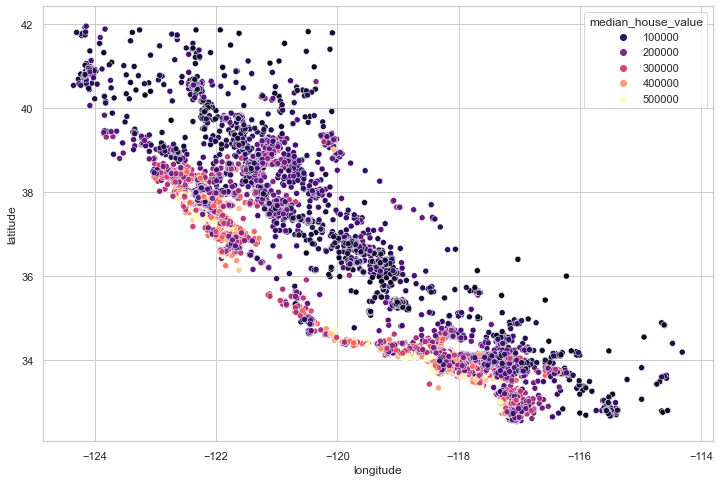

In [1306]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,
x='longitude',
y='latitude',
hue='median_house_value',
palette='magma'
);

Berdasarkan visualisasi peta negara bagian california menggunakan scatterplot (longitude dan latitude), rumah dengan median_house_value yang tinggi banyak terdapat di daerah pesisir yang berarti lebih banyak data dengan ocean_proximity <1H Ocean atau satu jam dari pantai

### Melihat Distribusi Dari features di Dataset

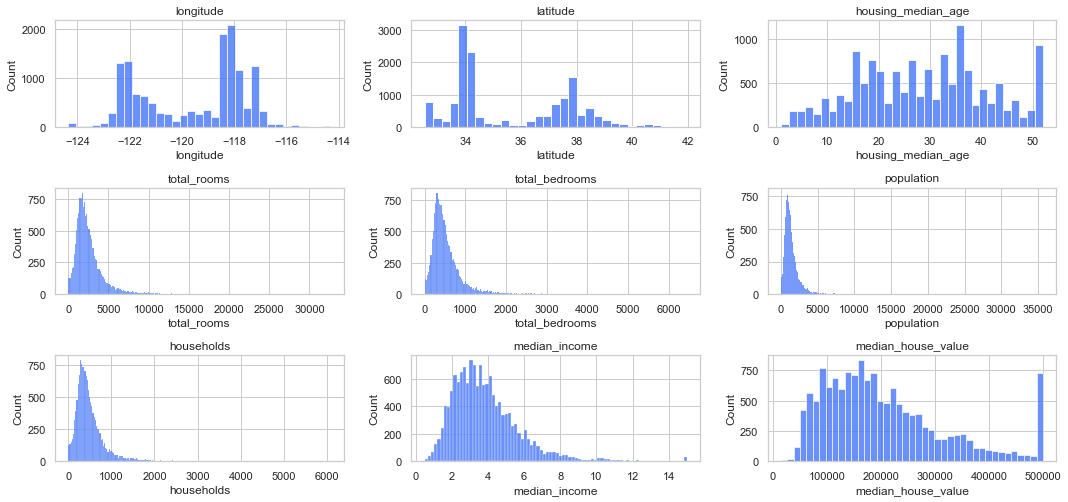

In [1307]:
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='rainbow')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Dari penggambaran Histogram, terlihat banyak fitur yang terdistribusi tidak normal (right skewed). Lalu pada features median_house_value serta housing_median_age terdapat kelonjakan jumlah yang cukup signifikan yang kita bisa sinyalir bahwa jumlah outliers di kategori tersebut cukup banyak

### Melihat outliers dari features numerikal di dataset

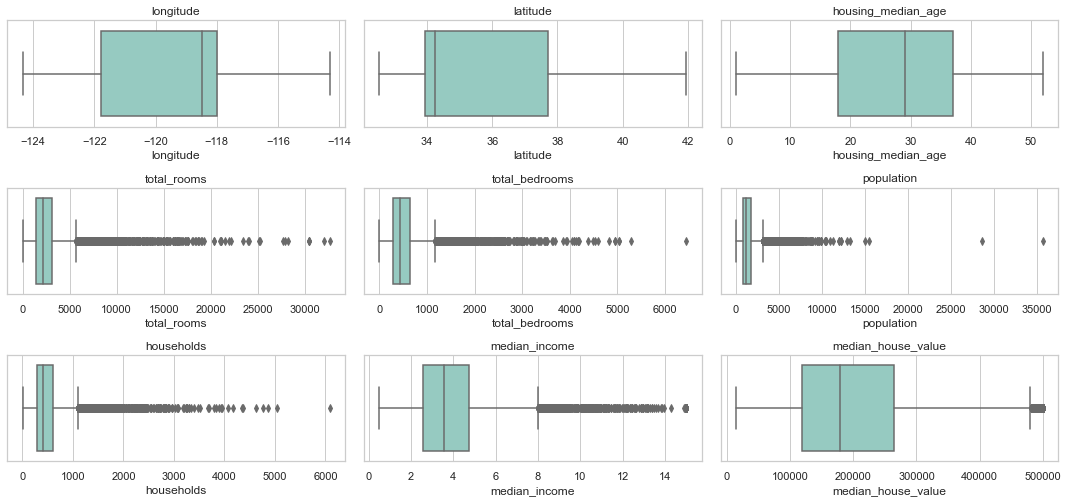

In [1308]:
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Berdasarkan penggambaran boxplot, Terdapat beberapa data outliers pada dataset, yang dimana akan kita lakukan pre-processing, sesuai dengan kebutuhan bisnis

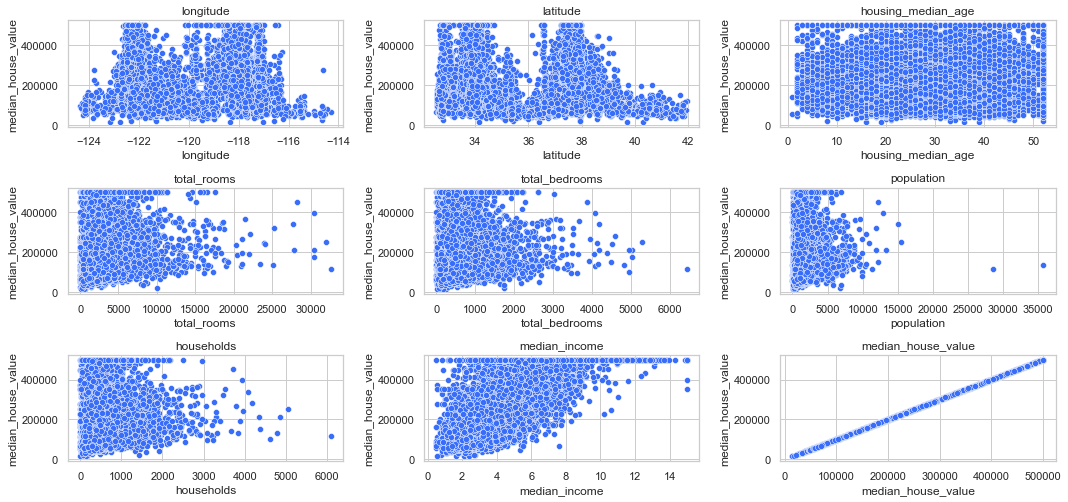

In [1309]:
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='rainbow')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.scatterplot(x=feature,y='median_house_value', data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

pada scatterplot di atas, kita ingin melihat hubungan atau korelasi antara median_house_value sebagai target dengan feature lainnya, yang dimana kita bisa lihat ada korelasi yang cukup besar antara median_house_value dengan median_income secara kasat mata

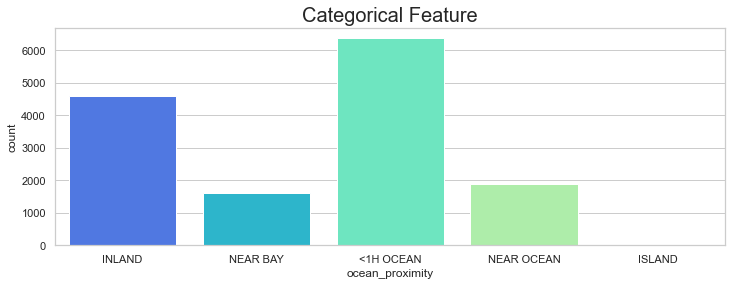

In [1310]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='ocean_proximity')
plt.title('Categorical Feature',size=20);

Berhubung hanya ada satu kolom katgorikal yaitu **ocean_proximity** kita dapat melihat bahwa banyak cluster rumah yang merupakan kategori <1H ocean atau satu jam dari laut/pantai

Selanjutnya kita juga ingin mengatahui berapa penghasilan rata-rata orang yang mempunyai rumah terhadap target harga rumah yang ingin kita prediksi nanti, karena features **median_income** tidak terdistribusi normal, maka kita akan kelompokkan median income kedalam beberapa grup penghasilan atau *Group Income*

In [1311]:
def group_income(nilai):

    if nilai <2:
        return(1)
    elif nilai < 4:
        return (2)
    elif nilai < 6:
        return(3)
    elif nilai < 8:
        return(4)
    elif nilai < 10:
        return(5)
    else:
        return(6)
    


In [1312]:
df['group_income'] = df['median_income'].apply(group_income)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,group_income
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,2
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,4
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,1
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,2
...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,3
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,2
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,2
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,3


In [1313]:
df.groupby('group_income').median()[['median_house_value']]

,median_house_value
group_income,
1,93800.0
2,152800.0
3,226000.0
4,335500.0
5,483300.0
6,500001.0


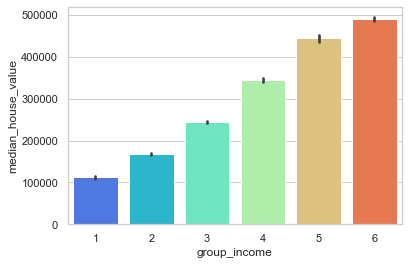

In [1314]:
sns.barplot(data=df,x='group_income',y='median_house_value');

Dari Barplot di atas dapat kita lihat, bahwa orang-orang dengan golongan group_income 6 (memiliki median pendapatan di atas 100.000 dollar) memiliki rumah di median >= 500.000 dollar

In [1315]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,group_income
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079528,0.108161,0.064218,-0.010093,-0.045777,-0.008484
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076796,-0.117704,-0.080046,-0.085176,-0.143957,-0.083789
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.329448,-0.299736,-0.312394,-0.120396,0.103863,-0.126598
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.931993,0.853460,0.919292,0.199549,0.131972,0.197430
total_bedrooms,0.079528,-0.076796,-0.329448,0.931993,1.000000,0.874618,0.978561,-0.004160,0.045915,-0.000086
population,0.108161,-0.117704,-0.299736,0.853460,0.874618,1.000000,0.905061,0.006284,-0.026183,0.013365
households,0.064218,-0.080046,-0.312394,0.919292,0.978561,0.905061,1.000000,0.016365,0.061581,0.020616
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004160,0.006284,0.016365,1.000000,0.693273,0.946350
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045915,-0.026183,0.061581,0.693273,1.000000,0.662848
group_income,-0.008484,-0.083789,-0.126598,0.197430,-0.000086,0.013365,0.020616,0.946350,0.662848,1.000000


## 3. Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [1316]:
# Membuat duplikasi dataframe
df_model = df.copy().drop(columns='group_income')

In [1317]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-121.44, -118.46]"
1,latitude,float64,0,0.00,836,"[34.42, 32.71]"
2,housing_median_age,float64,0,0.00,52,"[51.0, 22.0]"
3,total_rooms,float64,0,0.00,5227,"[2426.0, 1591.0]"
4,total_bedrooms,float64,137,0.95,1748,"[134.0, 1006.0]"
5,population,float64,0,0.00,3498,"[2667.0, 3166.0]"
6,households,float64,0,0.00,1649,"[1419.0, 74.0]"
7,median_income,float64,0,0.00,9797,"[3.9565, 4.7228]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[125600.0, 372000.0]"


Dari info dataset di atas, terdapat 137 data yang kosong pada kolom total_bedrooms yang cukup berkorelasi dengan fitur-fitur lain seperti total_rooms, population, dan households. Berdasarkan korelasi itu, kita bisa melakukan imputing menggunakan **Iterative Imputer** dimana imputer akan memprediksi missing value menggunakan regresi berdasarkan fitur-fitur lainnya.

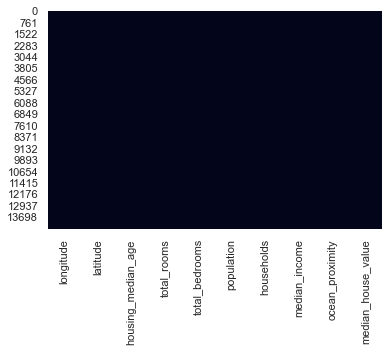

In [1318]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

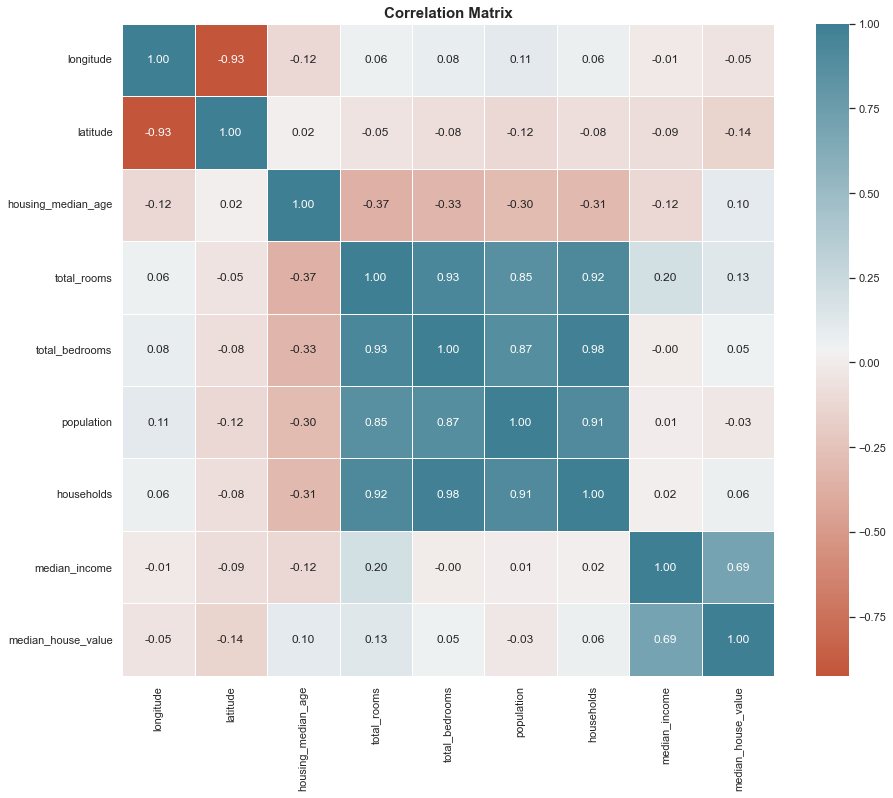

In [1319]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Koefisien korelasi berkisar antara -1 sampai 1. Bila mendekati 1 berarti terdapat korelasi positif yang kuat; misalnya, median house value cenderung naik ketika median income naik.

Ketika koefisien mendekati -1, berarti ada korelasi negatif yang kuat. Kita dapat melihat korelasi negatif kecil antara garis latitude dan median house value (yaitu, harga memiliki sedikit kecenderungan untuk turun saat perumahan berada di utara).

Terakhir, koefisien mendekati nol berarti tidak ada korelasi linier.

In [1320]:
# Outliers

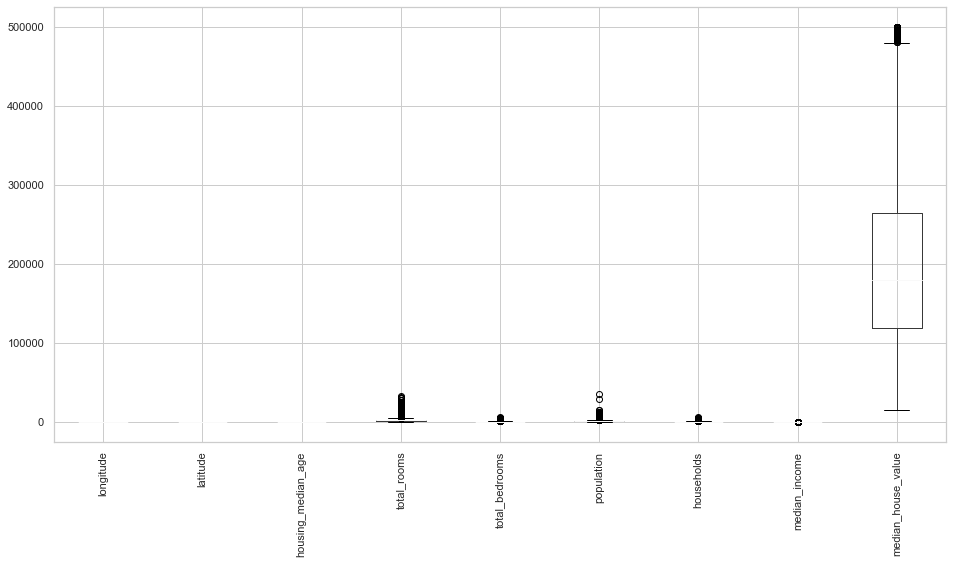

In [1321]:
plt.figure(figsize=(16,8))
df_model.boxplot(rot=90);

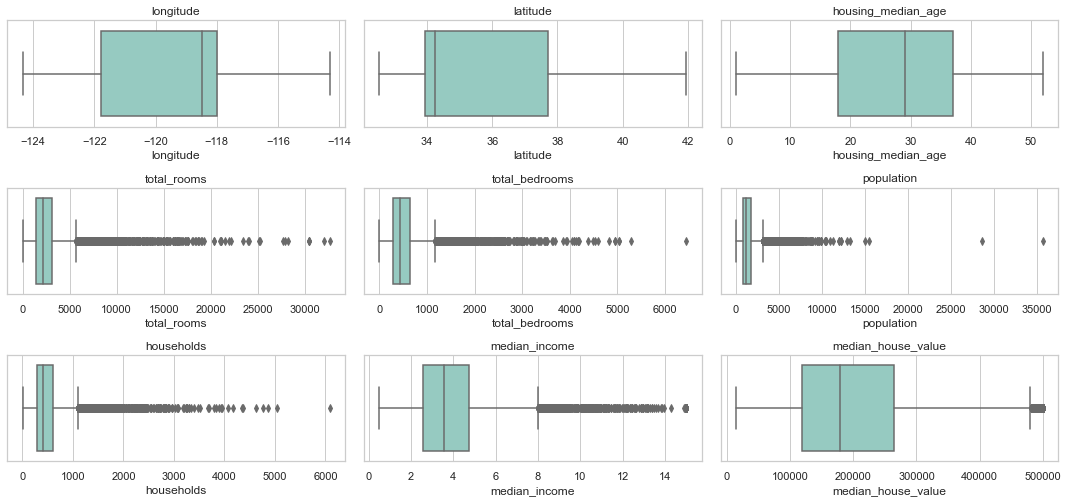

In [1322]:
num_feature = [fea for fea in df_model.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df_model);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

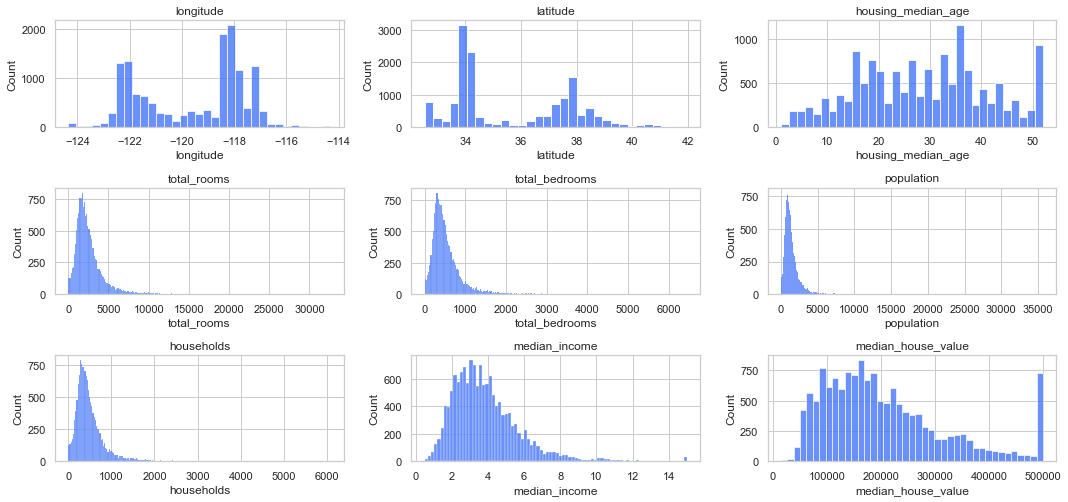

In [1323]:
num_feature = [fea for fea in df_model.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='rainbow')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(x=feature, data=df_model);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Berdasarkan graphic diatas dapat dilihat ada beberapa feature yang memiliki outlier seperti yang sudah kita lakukan pada EDA di bab sebelumnya. Outlier adalah pengamatan yang jauh dari titik data lainnya dalam sampel acak dari suatu populasi. Dalam ilmu data, kita sering ingin membuat asumsi tentang populasi tertentu. Namun adanya nilai ekstrem dapat berdampak signifikan pada kesimpulan hasil interpretasi yang kita amati dari data atau model machine learning. Dengan deteksi dan penanganan terterntu, anomali ini dapat dilihat sebagai bagian dari populasi yang berbeda.

Walaupun keberadaan outlier dapat mempengaruhi model machine learning kita, tapi tidak selamanya outlier harus dihilangkan. Adanya outlier dalam suatu data bukan berarti data tersebut buruk, bisa jadi outlier yang ada mengandung informasi yang berguna yang bisa dimanfaatkan untuk analisis data.

Untuk kasus kali ini, kita tidak akan menghilangkan outliers, karena berdasarkan domain knowledge, outlier yang ada pada dataset merupakan hal yang wajar mengingat banyak faktor-faktor yang mempengaruhi harga rumah.


## Penambahan Features

Dalam menilai harga suatu rumah, sebenarnya informasi jumlah kamar di suatu area tidak terlalu berguna. Yang kita inginkan sebenarnya adalah jumlah kamar per KK (kartu keluarga ). karena biasanya jumlah kamar yang ada dalam suatu rumah akan berpengaruh terhadap harga. Demikian pula, jumlah kamar tidur sendiri tidak terlalu berguna, kita mungkin ingin membandingkannya dengan jumlah kamar yang ada. Dan banyaknya anggota keluarga dalam per KK juga sepertinya merupakan kombinasi atribut yang menarik untuk dilihat, karena jumlah anggota keluarga biasanya berhubungan dengan luas atau tidaknya rumah tersebut yang mana tentu saja berpengaruh terhadap harga rumah.

Disini kita tidak akan melakukan pengurangan features, karena dikhawatirkan akan terjadi underfitting, yang menyebabkan nilai RMSE,MAE, dan MAPE model menjadi lebih buruk

In [1324]:
df_model['rooms_per_household'] = df_model['total_rooms']/df_model['households']

df_model['bedrooms_per_room'] = df_model['total_bedrooms']/df_model['total_rooms']

df_model['population_per_household']=df_model['population']/df_model['households']

In [1325]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,2.800000,0.250000,4.825000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [1326]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 14448 non-null  float64
 1   latitude                  14448 non-null  float64
 2   housing_median_age        14448 non-null  float64
 3   total_rooms               14448 non-null  float64
 4   total_bedrooms            14311 non-null  float64
 5   population                14448 non-null  float64
 6   households                14448 non-null  float64
 7   median_income             14448 non-null  float64
 8   ocean_proximity           14448 non-null  object 
 9   median_house_value        14448 non-null  float64
 10  rooms_per_household       14448 non-null  float64
 11  bedrooms_per_room         14311 non-null  float64
 12  population_per_household  14448 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.4+ MB


In [1327]:
# pip install xgboost

## 4. Modelling

In [1328]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Define X and Y

In [1329]:
X = df_model.drop(columns=['median_house_value'])
y = df_model['median_house_value']

In [1330]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('imp_iterative', IterativeImputer(), ['total_bedrooms','bedrooms_per_room']),
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
], remainder='passthrough')

## Train Test Split

In [1331]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=0)

In [1332]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()
# menggunakan robust karena banyak outliers

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]


rmse_mean =[]
rmse_std = []
mae_mean = []
mae_std = []
mape_mean = []
mape_std = []


# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    kfold= KFold(n_splits=5, shuffle=True, random_state=0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', i)
    ])
    scorings = {
        'RMSE':'neg_root_mean_squared_error',
        'MAE' :'neg_mean_absolute_error',
        'MAPE':'neg_mean_absolute_percentage_error'
    }
    model_cv = cross_validate(
        estimator, 
        X_train, 
        y_train, 
        cv=kfold, 
        scoring=scorings, 
        error_score='raise'
        )


    # print(model_cv['test_RMSE'].mean())
    # print(model_cv['test_RMSE'].std())
    
    # print(model_cv['test_MAE'].mean())
    # print(model_cv['test_MAE'].std())

    # print(model_cv['test_MAPE'].mean())
    # print(model_cv['test_MAPE'].std())

    rmse_mean.append(model_cv['test_RMSE'].mean())
    rmse_std.append(model_cv['test_RMSE'].std())

    mae_mean.append(model_cv['test_MAE'].mean())
    mae_std.append(model_cv['test_MAE'].std())

    mape_mean.append(model_cv['test_MAPE'].mean())
    mape_std.append(model_cv['test_MAPE'].std())

    print(i , model_cv)


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression()) {'fit_time': array([0.0450995 , 0.04176044, 0.03864241, 0.05985284, 0.0428493 ]), 'score_time': array([0.01356483, 0.01348042, 0.00800562, 0.01051497, 0.00770187]), 'test_RMSE': array([-93349.79125771, -81673.51321539, -90226.58122491, -90052.05635513,
       -98524.41876061]), 'test_MAE': array([-52537.43167239, -50431.42245718, -50618.4217005 , -51455.49084796,
       -54006.13127214]), 'test_MAPE': array([-0.26676677, -0.25997943, -0.25344212, -0.25345229, -0.26437633])}
TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor()) {'fit_time': array([0.05327392, 0.04360032, 0.04464531, 0.04502439, 0.04288507]), 'score_time': array([0.11846995, 0.11807227, 0.11372852, 0.11233926, 0.112993  ]), 'test_RMSE': array([-64031.23412822, -61574.62756021, -58726.60596223, -61438.81790856,
 

Metric yang akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah regressi adalah dengan menghitung Root Mean Square Error, Mean Square Error dan Mean Absolute Error.

Root Mean Square Error (RMSE), adalah akar jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan dibagi dengan jumlah data.

Mean Square Error sama halnya dengan RMSE, hanya saja tidak menggunakan proses akar. Pada tahap ini, jika nilai error nya semakin besar maka semakin besar nilai MSE yang dihasilkan.

MAE atau Mean Absolute Error menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi. Sedangkan Mean Absolute Percentage Error adalah lanjutan dari penentuan nilai MAE dengan menentukan nilai presentase yang dihasilkan

Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan maka semakin dekat nilai atau jarak antara nilai aktual dengan nilai prediksi.

In [1333]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': rmse_mean,
    'Std_RMSE': rmse_std,
    'Mean_MAE': mae_mean,
    'Std_MAE': mae_std,
    'Mean_MAPE': mape_mean,
    'Std_MAPE': mape_std
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-90765.272163,5483.485030,-51809.779590,1326.511273,-0.259603,0.005478
1,KNN Regressor,-61764.267395,1797.867978,-41587.980143,681.668363,-0.221145,0.006118
2,DecisionTree Regressor,-71163.915480,1158.863182,-46130.416606,659.222334,-0.249013,0.008636
3,RandomForest Regressor,-51105.848194,1776.099465,-32760.070643,706.753724,-0.169835,0.004598
4,XGBoost Regressor,-49017.712009,1829.258768,-31663.143370,483.645413,-0.164097,0.004674


- mean menjauhi 0 (makin jelek / error makin besar)
- std makin kecil, makin stabil

Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik, diikuti oleh RandomForest Regressor
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [1334]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,47838.100791,31943.018449,0.179869
RandomForest,51648.386666,33932.815664,0.188760


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model. 

XGboost atau Extreme Gradient Boosting adalah algoritma machine learning yang bisa digunakan untuk regresi dan juga klasifikasi.

Kenapa algorithma XGboost seringkali menjadi algorithma yang paling baik diantara yg lain? hal ini dikarenakan Boosting merupakan suatu metode machine learning yang sifatnya iteratif.

Konsepnya, boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah. Kita mentransformasi weak learner menjadi strong learner. Weak learner dapat dipandang sebagai model machine learning yang performanya tidak terlalu bagus.

siklus dalam gradien boosting adalah pertama kita membuat satu tree lalu kita perbaiki modelnya dengan cara memberikan perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses dilakukan terus menerus hingga titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya.

In [1335]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 151))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


In [1336]:
# ?XGBRegressor

In [1337]:
# Hyperparam space XGboost
hyperparam_space_xgb = {
    'algo__max_depth': max_depth, 
    'algo__learning_rate': learning_rate,
    'algo__n_estimators': n_estimators,
    'algo__subsample': subsample,
    'algo__gamma': gamma,
    'algo__colsample_bytree': colsample_bytree,
    'algo__reg_alpha': reg_alpha,
    'scaler' : [minmax,standard,robust],
    
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', robust),
        ('algo', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 0  
)


In [1338]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_iterative',
                                                                               IterativeImputer(),
                                                                               ['total_bedrooms',
                                                                                'bedrooms_per_room']),
                                                                              ('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', RobustSca...
                                                            0.05994842503189409,
                                                            0.1668100537200059,
                                                            0.46415888336127775,
                                                            1.2915496650148828,
                                                            3.593813663804626,
                                                            10.0],
                                        'algo__subsample': [0.2, 0.3, 0.4, 0.5,
                                                            0.6, 0.7, 0.8,
                                                            0.9],
                                        'scaler': [MinMaxScaler(),
                                                   StandardScaler(),
                                                   RobustScaler()]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [1339]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_algo__subsample,param_algo__reg_alpha,param_algo__n_estimators,param_algo__max_depth,param_algo__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
18,6.361337,0.310928,0.089089,0.032549,RobustScaler(),0.9,0.001,106,10,0.2,...,160.090371,1,-0.182522,-0.175041,-0.170346,-0.165941,-0.175839,-0.173938,0.005574,1
41,5.206080,0.480861,0.139498,0.078501,RobustScaler(),0.5,0.16681,139,8,0.11,...,373.906936,2,-0.191065,-0.180373,-0.170679,-0.171952,-0.179555,-0.178725,0.007298,2
39,3.263992,0.211229,0.063130,0.022160,RobustScaler(),0.9,0.001,104,8,0.19,...,853.314153,4,-0.191938,-0.194563,-0.179651,-0.171359,-0.182266,-0.183955,0.008441,5
2,7.298896,0.393218,0.095818,0.031454,MinMaxScaler(),0.9,0.464159,104,10,0.27,...,390.019199,3,-0.189944,-0.182465,-0.172416,-0.168914,-0.181927,-0.179133,0.007554,3
10,2.171946,0.130180,0.081729,0.033493,MinMaxScaler(),0.9,1.29155,113,7,0.18,...,585.293591,6,-0.193456,-0.197243,-0.184176,-0.183225,-0.190876,-0.189795,0.005381,6


In [1340]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -48034.28360160149
Best_params: {'scaler': RobustScaler(), 'algo__subsample': 0.9, 'algo__reg_alpha': 0.001, 'algo__n_estimators': 106, 'algo__max_depth': 10, 'algo__learning_rate': 0.2, 'algo__gamma': 9, 'algo__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [1341]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,48366.142577,31648.298675,0.177413


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [1342]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,47838.100791,31943.018449,0.179869


In [1343]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,48366.142577,31648.298675,0.177413


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 	47838.100791, 31943.018449, 0.179
- RMSE, MAE & MAPE setelah tuning: 48366.142577, 31648.298675, 0.177

<AxesSubplot:>

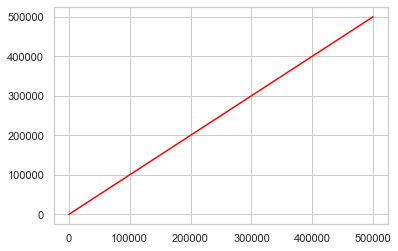

In [1344]:
a = [0,500000]
b = [0,500000]

sns.lineplot(x=a, y=b, color='r')

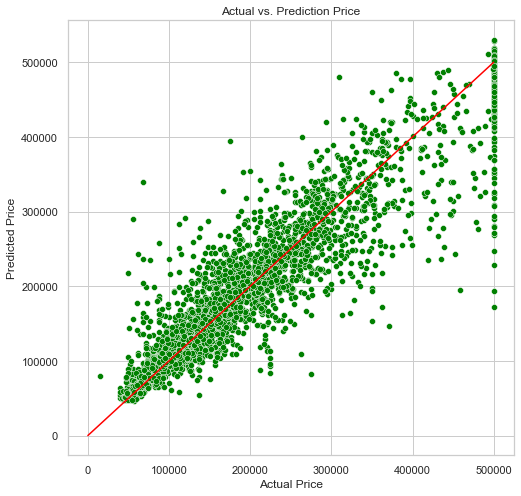

In [1345]:
from seaborn import color_palette


plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning,color='green').set(title='Actual vs. Prediction Price', xlabel='Actual Price', ylabel='Predicted Price');
sns.lineplot(x=[0,500000],y=[0,500000],color='red');

Berdasarkan grafik diatas, perbandingan antara nilai harga yang diprediksi dengan harga actual terlihat cukup bagus dengan membentuk suatu pola yang linear. Namun masih terdapat sedikit error yang dimana terkadang ada data yang diprediksi nilainya rendah namun nilai aktualnya tinggi terutama pada rumah dengan harga di atas 400.000 yang merupakan kekurangan dari model ini di mana residual errornya cukup besar, hal ini dikarenakan outliers yang terdapat pada dataset. tetapi hal ini masih dalam batas yang wajar mengingat nilai MAPE yang didapat yaitu 17% dimana artinya dapat dikategorikan kedalam 'Good forecast'

Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting

**Feature Importances**

In [1346]:
len(xgb_tuning['algo'].feature_importances_)

15

In [1347]:
len(transformer.get_feature_names_out())

15

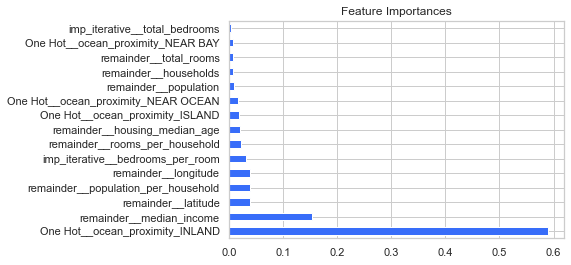

In [1348]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['algo'].feature_importances_,transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

## 5. Conclusion
Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

Hal ini cukup wajar artinya kita dapat mengkonfirmasi bahwa lokasi ternyata masih menjadi predictor yang paling kuat dalam menentukan harga suatu rumah. semakin rumah tersebut berada dalam area / kawasan yang elit, tentu saja harga rumah nya akan tinggi dan juga sebaliknya. Dalam kasus ini rumah yg berada di kawasan pinggir dengan view laut merupakan rumah yang paling mahal dibandingkan dengan rumah yang berada di lokasi lainnya.

Hal ini juga berbanding lurus dengan fitur median income, dimana rata-rata penghasilan seseorang dalam suatu area akan menentukan harga rumah di sekitarnya. semakin besar rata-rata penghasilan seseorang di area tersebut, maka akan semakin mahal harga rumahnya, begitu pula sebaliknya.

Jika kita melihat berdasarkan nilai RMSE, didapati nilai RMSE cukup tinggi, hal ini dikarenakan metric RMSE memiliki beberapa kelemahan: RMSE dipengaruhi oleh skala dari data. Semakin besar skala, maka nilai RMSE nya juga besar. RMSE juga dipengaruhi oleh outlier, semakin banyak outlier maka RMSE juga bisa semakin besar. seperti yang kita ketahui data kita memiliki outlier yg cukup banyak, tapi jika outlier nya dihilangkan maka kita akan loss informasi yang banyak pula. 

Oleh karena itu pada kasus ini kita bisa lebih fokus melihat hasil pemodelan menggunakan metric MAPE yang tidak terlalu sensitive terhadap adanya outlier, dimana hasil dari metric MAPE sendiri yg sebesar 17% yang artinya persen kesalahan hasil prediksi data dibanding data actual hanya sekitar 17%. Selain itu nilai MAPE 17% artinya termasuk kedalam kategory 'Good Forecast' atau model peramalan baik.

## 6 .Recommendation
Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

- Penambahan fitur-fitur yang memiliki korelasi langsung dengan harga suatu rumah, misal luas rumah, fasilitas rumah, dan perusahaan/developer perumahan.

- Data perlu diperbaharui karena data yang digunakan merupakan data yang sudah lama yaitu tahun 1990. data ini tentu saja sudah sangat tidak relevan dengan kondisi pada saat ini. karena adanya faktor inflasi dan sebagainya.

- Dari sisi modeling mungkin dapat ditingkatkan dengan metode hyperparameter yang lebih baik seperti gridsearch. metode gridsearch mencoba seluruh kombinasi hyperparameter. sedangkan pada randomized search yang kita gunakan dalam model tidak semua kombinasi hyperparameter dicoba tetapi kita memilih secara acak dari seluruh kemungkinan kombinasi.

- Model ini dapat digunakan untuk prediksi harga perumahan yang memiliki fitur sejenis dengan dataset California house. Karena jika dilihat dari perbandingan nilai train dan test nya, performa model cukup stabil artinya model cenderung tidak overfitting/underfitting. Namun perlu diingat kembali bahwa data ini merupakan harga rumah di tahun 1990, yang tentu saja akan jauh berbeda dengan harga rumah di tahun sekarang, ini berkaitan dengan range harga harga yang akan diprediksi, karena jika range nya melewati atau diluar range harga dalam model, maka hasilnya akan menjadi bias

In [1349]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('algo', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('California_Housing_XGB.sav', 'wb'))

In [1350]:
# Load model
filename = 'California_Housing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))